# Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing  import MinMaxScaler

In [25]:
data=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [26]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [27]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [29]:
data['Date']=pd.to_datetime(data['Date'])
print(type(data.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [30]:
df=data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [31]:
df.reset_index(inplace=True)

In [32]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


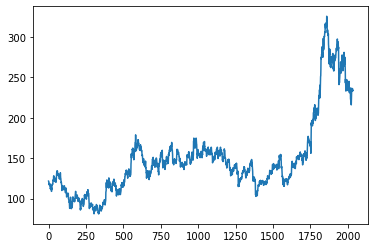

In [36]:
plt.plot(df['Close'])

In [39]:
df1=df['Close']

# PREPARING DATA

In [42]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [45]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [46]:
training_size,test_size

(1424, 611)

In [49]:
def create_dataset(dataset, timestep=1):
    dataX, dataY=[], []
    for i in range(len(dataset)-time_step-1): 
            a = dataset[i:(i+time_step), 0]
            dataX.append(a)
            dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)
        
                      
            


In [50]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [52]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [53]:
print(X_test.shape), print(y_test.shape)

(510, 100)
(510,)


(None, None)

In [54]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# MODEL BUILDING

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [59]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')   
model.summary()         

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 18s 323ms/step - loss: 0.0120 - val_loss: 0.0013
Epoch 2/60
19/19 [==============================] - 5s 243ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 3/60
19/19 [==============================] - 6s 305ms/step - loss: 8.9482e-04 - val_loss: 0.0012
Epoch 4/60
19/19 [==============================] - 6s 336ms/step - loss: 8.2463e-04 - val_loss: 0.0011
Epoch 5/60
19/19 [==============================] - 7s 350ms/step - loss: 8.0015e-04 - val_loss: 0.0010
Epoch 6/60
19/19 [==============================] - 6s 298ms/step - loss: 7.9026e-04 - val_loss: 0.0010
Epoch 7/60
19/19 [==============================] - 5s 264ms/step - loss: 7.5166e-04 - val_loss: 9.8318e-04
Epoch 8/60
19/19 [==============================] - 5s 281ms/step - loss: 7.3022e-04 - val_loss: 9.6282e-04
Epoch 9/60
19/19 [==============================] - 4s 216ms/step - loss: 7.4003e-04 - val_loss: 9.1280e-04
Epoch 10/60
19/19 [==============================] - 6s 308

In [63]:
test_predict=model.predict(X_test)

In [64]:
test_predict1=scaler.inverse_transform(test_predict)

In [65]:
test_predict1

array([[143.09595 ],
       [143.45474 ],
       [143.05696 ],
       [141.26427 ],
       [139.54118 ],
       [138.40332 ],
       [138.57043 ],
       [139.5479  ],
       [140.25523 ],
       [140.49188 ],
       [140.56801 ],
       [141.35396 ],
       [142.07803 ],
       [143.32816 ],
       [145.14716 ],
       [144.60043 ],
       [143.01292 ],
       [142.0737  ],
       [141.8575  ],
       [144.73796 ],
       [148.48601 ],
       [151.53363 ],
       [153.27098 ],
       [152.81728 ],
       [152.45781 ],
       [151.85756 ],
       [151.64038 ],
       [152.46173 ],
       [153.19432 ],
       [153.59294 ],
       [154.09837 ],
       [153.60818 ],
       [151.44553 ],
       [147.06096 ],
       [143.17657 ],
       [140.83473 ],
       [139.8776  ],
       [139.06247 ],
       [137.55565 ],
       [134.94472 ],
       [132.53004 ],
       [130.82146 ],
       [128.78282 ],
       [127.50803 ],
       [125.72442 ],
       [123.48265 ],
       [122.22465 ],
       [121.4

In [71]:
## calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test,test_predict))

0.041756427076338594